In [109]:
import json

with open("output3.json", "r", encoding='utf-8') as file:
    data = json.load(file)
file.close()

In [110]:
data_copy = data.copy

In [111]:
for item in data:
    if "tags" in item.keys():
        item["tags"] = [tag.strip("12345()") for tag in item["tags"]]

In [112]:
all_tags = list()

for item in data:
    if "tags" in item.keys():
        [all_tags.append(tag) for tag in item["tags"]]

In [113]:
all_titles = list()

for item in data:
        all_titles.append(item["title"])

len(all_titles)

266

In [114]:
all_tags = [element.strip("12345()") for element in all_tags]
len(all_tags)

1641

In [128]:
unique_tags = list(set(all_tags))
len(unique_tags)

346

In [119]:
import numpy as np
adjacency_matrix = np.zeros((len(unique_tags), len(unique_tags)))

In [132]:
tags_indices = {word:index for index, word in enumerate(unique_tags)}

In [138]:
for item in data:
    if "tags" in item.keys():
        for i in range(len(item["tags"])):
            for j in range(i+1, len(item["tags"])):
                tag1 = item["tags"][i]
                tag2 = item["tags"][j]
                index1 = tags_indices[tag1]
                index2 = tags_indices[tag2]
                adjacency_matrix[index1][index2] = 1
                adjacency_matrix[index2][index1] = 1

In [148]:
for item in data:
    for tag in item["tags"]:
        print(unique_tags.index(tag))

185
215
338
227
292
22
2
219
26
337
42
297
263
41
37
224
176
303
238
107
244
241
125
42
259
218
259
218
74
160
42
32
110
125
194
269
45
151
181
152
164
266
192
294
332
146
44
329
314
190
285
171
24
149
282
70
125
189
76
89
133
155
169
317
46
305
216
141
222
126
25
7
63
78
223
135
89
133
155
169
317
46
305
216
141
222
126
25
7
63
78
223
135
89
133
155
169
317
46
305
216
141
222
126
25
7
63
78
223
135
19
322
237
119
287
19
322
237
119
287
19
322
237
119
287
19
322
237
119
287
19
322
237
119
287
304
35
111
141
122
178
276
5
57
178
276
5
57
78


KeyError: 'tags'

In [151]:
file_path = 'adjacency_matrix.txt'
np.savetxt(file_path, adjacency_matrix, fmt='%d')

In [157]:
from igraph import Graph
from igraph import plot

graph = Graph.Read_Adjacency("adjacency_matrix.txt")
graph.vs["name"] = unique_tags

In [167]:
graph.vs["name"]

['زنجیره مارکوف',
 'ازکارافتادگی سرویس',
 'قابلیت',
 'بهره\u200cوری',
 'نیروی انسانی',
 'مساله کوله\u200cپشتی',
 'کان\u200cبان',
 'ترابری هوایی',
 'مثبت\u200cنگری',
 'ارزش ساختار شبکه ای',
 'مدل های گارچ',
 'اینترنت اشیا',
 'تعمیر و نگهداری',
 'زمان',
 'بازار رقابتی',
 ' صنعت فولاد',
 'فاکتور "مزیت نسبی و اثر آن بر استفاده کنندگان دانشگاهی" در مدل "تمایل به بکارگیری"',
 'رشد',
 'شخصی\u200cسازی',
 'شرکت',
 'تعمیم برند',
 'تومور',
 'ارزیابی',
 'توسعه قابلیتهای مدیریت پروژه',
 'گردشگری',
 'Reservation system',
 'ارزش سهامداران',
 'داده انبوه',
 'زنجیره ی بلوکی',
 'الگوریتهای فراابتکاری ترکیبی جستجوی همسایگی متغیر- جستجوی ممنوعه',
 'اجتماع یابی',
 'یادگیری عمیق',
 'تحلیل تأخر، فرکانس و پولی',
 'سیستم ارتباطات دوربرد',
 'شاخص\u200cهای کلیدی عملکرد',
 'بازاریابی خدماتی',
 'پیاده\u200cسازی',
 'سامانه اتوبوس\u200cرانی',
 'پردازش زبان طبیعی',
 'مکاتبات رسمی',
 'نشانه\u200cگذاری',
 'پیش\u200cبینی زمان ورود',
 'ارزش طول عمر مشتری',
 'علامت تجاری',
 'داده کاوی',
 'تجزیه و تحلیل خوشه\u200cای',
 'cl

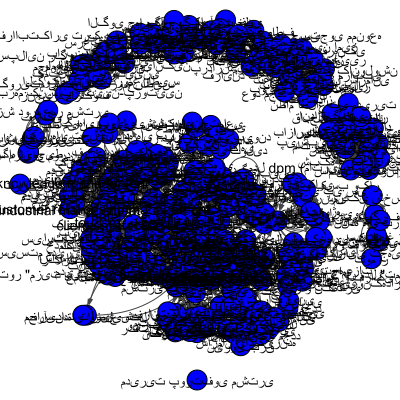

In [166]:
layout = graph.layout("kk")
visual_style = {"vertex_color": "blue", "vertex_size": 20, "vertex_label": graph.vs["name"], "edge_arrow_size": 0.5}

plot(graph, "graph.png", layout=layout, bbox=(400, 400), **visual_style)

In [155]:
degree_centrality = graph.degree()
graph.vs["degree_centrality"] = degree_centrality
file_path = "graph.graphml"
graph.write_graph(file_path, format='graphml')